### Note book Three

Putting it all together. Use this notebook and the previous to answer the research qusetions below.  

__Research questions:__


1. _How do the values found on the day of the survey compare to previous values?_
2. _Does the data indicate that shoreline litter densities are seasonal? If so describe the relationship._
3. _Based on previous results, what was the probability of finding more trash than you did? Less trash?_

#### Contents

1. Putting the variaibles in place => _complete_
2. Abundance: comparing surveys by top-ten => _complete_
3. Density: comparing surveys  by pieces per meter => _complete_
4. Probability => _coming soon_

#### Remarks

1. Most of the methods have been moved to the utilities folder

#### Usage

It is best if you develop your own notebooks and add them to the repo. Use this as an example. 


contributors: @hammerdirt, @terborch


In [24]:
import numpy as np
import datetime
from collections import OrderedDict
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
from matplotlib import colors as mcolors
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import Utilities.MlwCode as mlw_code
import Utilities.utilities as my_utilities
import Utilities.SeasonalBoxPlots as seasonalBoxPlots
import Utilities.MonthlyResultsBoxPlots as monthlyResults
import matplotlib.gridspec as gridspec

### Assigning variables and getting data:

Using the methods from the previous notebooks, choose the codes of interest and assign colors and parameters to variables.

In [2]:
# Variables to constrict the MLW code data into classes
codes_of_interest =["G32","G67","G82","G79"]
# Day and location of interest:
date_of_interest = "2019-10-10"
# this needs to be exactly the way it is stored, check the webiste for correct spelling
place_of_interest = "Parc-des-Pierrettes"
# the lake or body of water you are comparing to:
region_of_interest = "Lake Geneva"
# used as place holders in the function, one for each code:
variable_names=["beach_info", "get_toys", "get_sheeting", "get_plastics"]
# Give a common name to the MLW codes these appear in the charts:
names=["Toys", "Plastic-sheeting", "Polystyrene", "Broken plastics"]
# A color for each code, use named matplotlib codes:
colors = ["darkmagenta", "darkslategray", "darkorange", "teal"]
# the api end point:
end_point = "http://mwshovel.pythonanywhere.com/dirt/codes/Lac-L%C3%A9man/"
# group the months into seasons:
seasons = {"winter":[12,1,2],"spring":[3,4,5],"summer":[6,7,8],"fall":[9,10,11]}
# the colors for each season of the year:
seasons_colors = {"winter":"cyan","spring":"lime","summer":"saddlebrown","fall":"darkgoldenrod",}
# Link months integer value to string abbreviation:
months = {
    1:"Jan",
    2:"Feb",
    3:"Mar",
    4:"Apr",
    5:"May",
    6:"Jun",
    7:"Jul",
    8:"Aug",
    9:"Sep",
    10:"Oct",
    11:"Nov",
    12:"Dec",
}
# making the file structure
# if you changed the file structure then this function will be problematic
folders = ["Data", "Charts", "Utilities"]
here = os.getcwd()

In [3]:
# helper functions:
def aBarPlot(ax,data, location, num_samps, dates):
    my_cmap = plt.cm.get_cmap('plasma')
    color=iter(my_cmap(np.linspace(0,1,10)))
    labels, bloxs = zip(*data) 
    bottom = 0
    width = 0.8
    x = 1,
    pad =6
    loc='center'
    title="Top ten {}, n={}\n{}".format(location, num_samps, dates)
    y_limit = sum(bloxs)+.1
    for i,blox in enumerate(bloxs):
        ax.bar(x,blox, width, bottom=bottom, color=next(color), label=labels[i])
        bottom += blox
    ax.set_title(title, pad=pad, loc=loc, fontsize=12)
    ax.set_ylim(-.1,y_limit)
    ax.set_xticks([])
    ax.set_ylabel("Pieces of trash identified", labelpad=15)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title='codes', loc='upper right')
def makeSeasonalBoxPlots(code_index,data_of_interest, day_of_interest, names,seasons, my_folders):
    obj_name = names[code_index]
    this_data = data_of_interest[code_index]["month"]
    my_seasons, my_summary = mlw_code.makeSeasons(this_data, seasons)
    code_of_interest = codes_of_interest[code_index]
    the_title = "{}, all locations 2015-2018 Lake Geneva\n".format(obj_name, code_of_interest)
    file_name = "{}bySeaonBoxPlot".format(code_of_interest)
    myday_y , my_month = my_utilities.getValueOfInterestFromDayOfInterest(day_of_interest, code_of_interest)    
    seasonalBoxPlots.seasonalBoxPlots(my_seasons, myday_y, my_month, months, obj_name, seasons, the_title, file_name, my_folders)
    return my_summary
def makeMonthlyBoxPlots(code_index, my_folders, day_of_interest, show):
    rows = 3
    columns = 4
    data = data_of_interest[code_index]
    width = 0.8
    group_by = "month"
    obj_name = names[code_index]
    code_of_interest = codes_of_interest[code_index]
    the_title = "{}, code: {}, all locations 2015-2018 Lake Geneva\n".format(obj_name, code_of_interest)
    file_name = "{}byMonthBoxPlot".format(code_of_interest)
    myday_y , my_month = my_utilities.getValueOfInterestFromDayOfInterest(day_of_interest, code_of_interest) 
    monthlyResults.monthlyResults(rows, columns, myday_y , my_month, data, months, group_by, width, obj_name, colors, the_title, file_name, my_folders, show)
def getCodeQuantity(aDf):
    by_code = aDf[["code_id", "quantity"]].groupby(["code_id"]).sum()
    by_code.sum()
    by_code_sorted = by_code.sort_values("quantity",ascending=False)      
    return  by_code.sum(), list(zip(by_code_sorted.index.values,by_code_sorted['quantity']))
def getTopTen(aList):
    return aList[:10]
def getJustOne(aList, index):
    if type(aList[0]) == list or type(aList[0]) == tuple:
        what_i_want = [x[index] for x in aList]
    else:
        what_i_want = aList
    return what_i_want
def getTheSet(aList, bList):
    return list(set(aList) & set(bList)) 
def doTheyInterSect(aList, bList, index):
    a_list = getJustOne(aList, index)
    b_list = getJustOne(bList, index)
    what_i_want = getTheSet(a_list, b_list)
    return what_i_want
idx = pd.IndexSlice
def summaryString(aSummary):
    my_string = ""
    for k,v in aSummary.items():
        if k == "count":
            my_string += "{}: {:,.0f}\n".format(k,v)        
        else:
            my_string += "{}: {:,.2f}\n".format(k,v)
    return my_string
def makeElipsis(string, char):
    if len(string) > char:
        new_string = string[:char] + "..."
    else:
        new_string = string
    return new_string
def makeSeasonsAllData(data, seasons):
    what_i_want = {}
    for k,v in seasons.items():
        what_i_want[k] = data[data.month.isin(v)]['pcs_m'].values
    return what_i_want


In [4]:
# places to store output:
my_folders = my_utilities.make_folders(here, folders)
# get the basic information
i_want_these = mlw_code.makeClasessFromCodes(codes_of_interest, end_point)
# if you put more codes in the codes of interest you need to adjust the variables here
# capture the results: ORDER IS IMPORTANT!
toys, plastic_sheeting, polystyrene, frag_plastic = i_want_these[0], i_want_these[1], i_want_these[2], i_want_these[3]
# store the results in an array
results_of_interest=[toys,polystyrene,plastic_sheeting,frag_plastic]
# this is a dataframe of the summary stats for the codes of interest
df_toys_sheeting_styrene = my_utilities.joinDataFrames(results_of_interest, codes_of_interest)

# make groups by month and season:
# feed the results_of_interest to the makeGroupsFromClasses method
these_too = mlw_code.makeGroupsFromClasses(results_of_interest)
# capture the results: ORDER IS IMPORTANT!
toys_all_grouped, plastic_sheeting_grouped, polystyrene_grouped, frag_platic_grouped = these_too[0], these_too[1], these_too[2], these_too[3]
# store the results in an array
data_of_interest =[toys_all_grouped, plastic_sheeting_grouped, polystyrene_grouped, frag_platic_grouped]


# get all the data for the region and the data for the day of interest
my_data = mlw_code.getTheDataINeed(a_name ="pierrettes", api_url = "http://mwshovel.pythonanywhere.com/dirt/codes/Lac-L%C3%A9man/", date=date_of_interest)
the_day, all_the_days = my_data['the_day'], my_data["pierrettes"]

# store the regional data into a dataframe:
regional_data = pd.DataFrame(all_the_days)
regional_data= regional_data[regional_data.quantity != 0]
# make columns to output month and year in integer form:
regional_data["py_date"] = pd.to_datetime(regional_data["date"])
regional_data["month"] = regional_data["py_date"].dt.month
regional_data["year"] = regional_data["py_date"].dt.year
regional_data["log_of_pcs"] = np.log(regional_data['pcs_m'])


# group regional values by daily totals per location and date of survey:
all_pcs_day_totals = regional_data[["location_id","month", "date","py_date","pcs_m"]].groupby(["location_id","month", "date", "py_date"]).sum()
num_samps_region = len(all_pcs_day_totals)
min_date_region = regional_data["py_date"].min()
max_date_region = regional_data["py_date"].max()
min_date_location = regional_data[regional_data['location_id']==place_of_interest]["py_date"].min()
max_date_location = regional_data[regional_data['location_id']==place_of_interest]["py_date"].max()
all_pcs_day_totals.reset_index(inplace=True)

data_location_of_interest = regional_data[regional_data.location_id == place_of_interest].copy()
data_day_of_interest = regional_data[(regional_data.location_id == place_of_interest)&(regional_data.date == date_of_interest)].copy()
pcs_m_location = data_location_of_interest[["location_id","month", "date","py_date","pcs_m"]].groupby(["location_id","month", "date","py_date"]).sum()
pcs_m_location.reset_index(inplace=True)
num_samps_location = len(pcs_m_location)
# get the values for the codes of interest from the place of interest on the day interest
day_of_interest = regional_data.loc[
    (regional_data['code_id'].isin(codes_of_interest)) & (regional_data['date'] == date_of_interest)&(regional_data['location_id']==place_of_interest)
][["code_id", "pcs_m", "date"]].to_dict(orient="records")

['G32']
http://mwshovel.pythonanywhere.com/dirt/codes/Lac-L%C3%A9man/G32
['G67']
http://mwshovel.pythonanywhere.com/dirt/codes/Lac-L%C3%A9man/G67
['G82']
http://mwshovel.pythonanywhere.com/dirt/codes/Lac-L%C3%A9man/G82
['G79']
http://mwshovel.pythonanywhere.com/dirt/codes/Lac-L%C3%A9man/G79
['pierrettes']
http://mwshovel.pythonanywhere.com/dirt/codes/Lac-L%C3%A9man/


### How do the values found on the day of the survey compare to previous values?

1. Abundance: How do the top ten items from that day compare to the top ten for the rest of the lake?
   * Are the codes of interest in the top-ten for the lake? for that day? for that location?
2. Density: How does the pcs_m value found on that day compare to previous results for that location?
   * for the rest of the lake?


#### Abundance

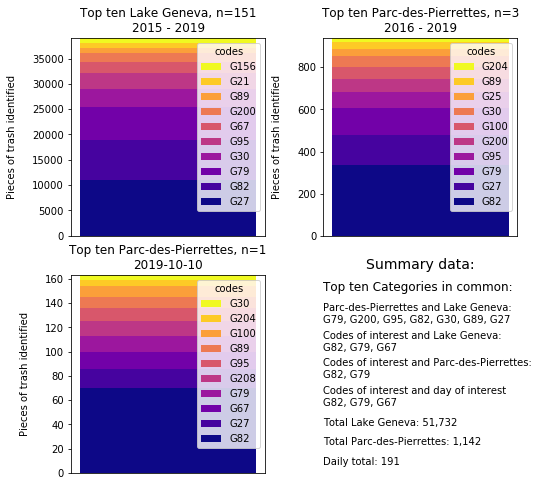

In [5]:
grand_total, all_the_tuples = getCodeQuantity(regional_data)
the_total, a_list_of_tuples =  getCodeQuantity(data_location_of_interest)
day_total, a_day_of_tuples =  getCodeQuantity(data_day_of_interest)
top_ten_region = getTopTen(all_the_tuples)
top_ten_location = getTopTen(a_list_of_tuples)
top_ten_day = getTopTen(a_day_of_tuples)

location_intersect_region = doTheyInterSect(top_ten_region,top_ten_location , 0)
codes_intersect_region = doTheyInterSect(top_ten_region, codes_of_interest, 0)
codes_intersect_location = doTheyInterSect(top_ten_location, codes_of_interest, 0)
codes_intersect_day = doTheyInterSect(top_ten_day, codes_of_interest, 0)

fig, axs = plt.subplots(2,2, figsize=(8,8))
plt.subplots_adjust(hspace=.2, wspace=.3)

aBarPlot(axs[0,0],top_ten_region, region_of_interest, num_samps_region, '{} - {}'.format(min_date_region.year, max_date_region.year))
aBarPlot(axs[0, 1], top_ten_location, place_of_interest, num_samps_location,  '{} - {}'.format(min_date_location.year, max_date_location.year))
aBarPlot(axs[1, 0], top_ten_day, place_of_interest, 1, date_of_interest)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
axs[1,1].axis('off')
axs[1,1].set_title("Summary data:", loc="center", fontsize=14 )
if len(location_intersect_region) > 0:    
    q_one = '{} and {}:'.format(place_of_interest, region_of_interest)
    q_two = 'Codes of interest and {}:'.format(region_of_interest)
    q_three = 'Codes of interest and {}:'.format(place_of_interest)
    q_four = 'Codes of interest and day of interest'
    q_five = "Total {}: {:,.0f}".format(region_of_interest, grand_total.values[0])
    q_six = "Total {}: {:,.0f}".format(place_of_interest, the_total.values[0])
    q_seven = "Daily total: {:,.0f}".format(day_total.values[0])
    axs[1,1].annotate("Top ten Categories in common:", (0,.92), fontsize=12)
    axs[1,1].annotate(q_one, (0,.82))
    if len(location_intersect_region) > 0:
        code_intersect = my_utilities.makeStringFromList(location_intersect_region)
        axs[1,1].annotate(code_intersect, (0,.76))
    else:
        axs[1,1].annotate("None", (0,.76))
    axs[1,1].annotate(q_two, (0,.68))
    if len(codes_intersect_region) > 0:
        code_intersect = my_utilities.makeStringFromList(codes_intersect_region)
        axs[1,1].annotate(code_intersect, (0,.62))
    else:
        axs[1,1].annotate("None", (0,.62))
    axs[1,1].annotate(q_three, (0,.54))
    if len(codes_intersect_location) > 0:
        code_intersect = my_utilities.makeStringFromList(codes_intersect_location )
        axs[1,1].annotate(code_intersect, (0,.48))
    else:
        axs[1,1].annotate("None", (0,.48))
    axs[1,1].annotate(q_four, (0,.40))
    if len(codes_intersect_day) > 0:
        code_intersect = my_utilities.makeStringFromList(codes_intersect_day )
        axs[1,1].annotate(code_intersect, (0,.34))
    else:
        axs[1,1].annotate("None", (0,.34))
    axs[1,1].annotate(q_five, (0,.24))
    axs[1,1].annotate(q_six, (0,.14))
    axs[1,1].annotate(q_seven, (0,.04))
save_to = '{}/Charts/{}Summary.svg'.format(here, place_of_interest)
plt.savefig(save_to)
plt.show()

#### Density

In [6]:
all_dates_and_values = all_pcs_day_totals[all_pcs_day_totals.location_id != place_of_interest][['py_date', 'pcs_m']].copy()
location_dates_values = pcs_m_location[['py_date', 'pcs_m']].copy()
summary_all = all_dates_and_values['pcs_m'].describe().to_dict()
summary_location = location_dates_values['pcs_m'].describe().to_dict()
just_values_all = all_dates_and_values['pcs_m'].copy()
just_values_location = location_dates_values['pcs_m'].copy()
place_date, place_pcs = zip(*location_dates_values.values)
date_all, pcs_all = zip(*all_dates_and_values.values)
time_series_title = "{} all locations, n={}, {} - {}".format(
    region_of_interest, num_samps_region, min_date_region.year, max_date_region.year
)
box_all_title = "{} all".format(region_of_interest)

font_ax_labels = {
    'family': 'sans-serif',
    'color':  'black',
    'weight': 'book',
    'size': 12,
}
font_ax_titles = {
    'family': 'sans-serif',
    'color':  'black',
    'weight': 'book',
    'size': 14,
}
font_ax_ticks = {
    'family': 'sans-serif',
    'color':  'black',
    'weight': 'normal',
    'size': 10,
}
font_ax_text = {
    'family': 'sans-serif',
    'color':  'black',
    'weight': 'normal',
    'size': 12,
}

C:\Users\poopy\.conda\envs\SWE_2019\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


C:\Users\poopy\Desktop\Master_semseter_Finale\Solid_Waste_Engineering\SWE_2019\SWE_2019/Charts/Parc-des-PierrettesDensitySummary.svg


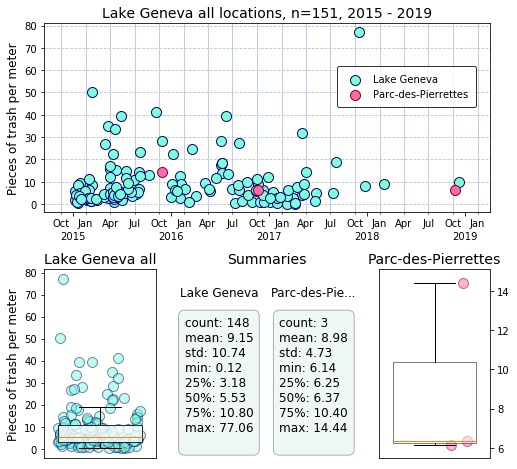

In [7]:

fig = plt.figure(constrained_layout=False, figsize=(8,8))
gs = fig.add_gridspec(2, 3, hspace=.3, wspace=.5)

# time series
ax2 = fig.add_subplot(gs[0,: ])
ax2.set_title(time_series_title, fontdict=font_ax_titles)
ax2.grid(axis="y", color="lightsteelblue", linestyle="dashed", linewidth=.8, which="major")
ax2.grid(axis="x", color="lightsteelblue", linestyle="solid", linewidth=.8, which="minor")
ax2.set_facecolor(color="white")
ax2.set_axisbelow(True)
ax2.scatter(date_all, pcs_all, color="aquamarine", s=100, edgecolor="navy", alpha=1, label=region_of_interest)
ax2.scatter(place_date, place_pcs, color="hotpink",  s=100, edgecolor="darkred", alpha=1, label=place_of_interest)
ax2.set_ylabel("Pieces of trash per meter", fontdict=font_ax_labels)
ax2.xaxis_date()
locator = mdates.MonthLocator(bymonth=None, bymonthday=1, interval=3, tz=None)
year_locator = mdates.YearLocator(1, month=11, day=15) # every month
fmt = mdates.DateFormatter('%b')
yr_fmt= mdates.DateFormatter('%Y')
ax2.xaxis.set_minor_locator(locator)
ax2.xaxis.set_major_locator(year_locator)
ax2.xaxis.set_minor_formatter(fmt)
ax2.xaxis.set_major_formatter(yr_fmt)
ax2.tick_params(axis="x", which="major", pad=15)
ax2.legend(loc="upper right", bbox_to_anchor=(0.98, 0.8), borderpad=0.8, edgecolor="black")

# boxplot all data:
width=0.75
ax3 = fig.add_subplot(gs[1:, 0])
ax3.set_title(box_all_title, fontdict=font_ax_titles)
ax3.set_ylabel("Pieces of trash per meter", fontdict=font_ax_labels)
ax3.boxplot(just_values_all, widths=width,
            showfliers=False, patch_artist=True,
            boxprops=dict(facecolor="white", color="black", alpha=0.8))
x = [1 + (np.random.rand(1)*width-width/2.) for x in just_values_all]
ax3.scatter(x,just_values_all, color="aquamarine", s=100, edgecolor="navy", alpha=0.5)
ax3.get_xaxis().set_ticks([])



# boxplot location of interest
ax5 = fig.add_subplot(gs[1, 2])
ax5.set_title(place_of_interest, fontdict=font_ax_titles)
ax5.boxplot(just_values_location, widths=width, showfliers=False, patch_artist=True, boxprops=dict(facecolor="white", alpha=0.5))
x = [1 + (np.random.rand(1)*width-width/2.) for x in just_values_location]
ax5.scatter(x,just_values_location, color="hotpink", s=100, edgecolor="darkred", alpha=0.5)
ax5.yaxis.tick_right()
ax5.get_xaxis().set_ticks([])

# summary box
ax4 = fig.add_subplot(gs[1, 1])
ax4.set_title("Summaries", fontdict=font_ax_titles, ha="center")
ax4.axis('off')
summary_string = summaryString(summary_all)
bbox_props = dict(boxstyle="round", fc=(0.8, 0.9, 0.9, 0.5), alpha=0.3 )
t = ax4.text(-.24, 0.4, summaryString(summary_all), ha="left", va="center", 
            fontdict=font_ax_text,
            bbox=bbox_props)
bb = t.get_bbox_patch()
bb.set_boxstyle("round", pad=0.5)
bbox_one_props = dict(boxstyle="round", fc=(0.8, 0.9, 0.9, 0.5), alpha=0.3 )
t_one = ax4.text(0.61, 0.4, summaryString(summary_location), ha="left", va="center", 
            fontdict=font_ax_text,
            bbox=bbox_one_props)
bb_one = t_one.get_bbox_patch()
bb_one.set_boxstyle("round", pad=0.5)

t_two = ax4.text(0.53, 0.91, makeElipsis(place_of_interest, 12), ha="left", va="top", 
            fontdict=font_ax_labels,
           )
t_two_x = ax4.text(-.28, 0.91, makeElipsis(region_of_interest, 12), ha="left", va="top", 
            fontdict=font_ax_labels,
           )

save_to ="{}/Charts/{}DensitySummary.svg".format(here, place_of_interest)
print(save_to)
plt.savefig(save_to)
plt.show()

In [21]:
pd.DataFrame()

,0
0,2018-04-02
1,2016-01-24
2,2017-02-16
3,2016-04-02
4,2018-05-08
...,...
143,2017-08-25
144,2017-09-26
145,2017-10-24
146,2017-11-17


In [23]:
pd.DataFrame(place_date)

,0
0,2016-10-13
1,2017-10-05
2,2019-10-10


### Does the data indicate that shoreline litter densities are seasonal? If so describe the relationship.

1. What does the distribution of results look like for the codes of interest?
   * For all values on the lake
2. What are the median values for each season for each code of interest?
   * If you aggregate all values in to 12 months (eliminate the year)
   * If you aggregate seasonal year over year?(Can we do this? Does the data support it?)
   * If the median values change seasonally how does that relate to the rest of the lake?

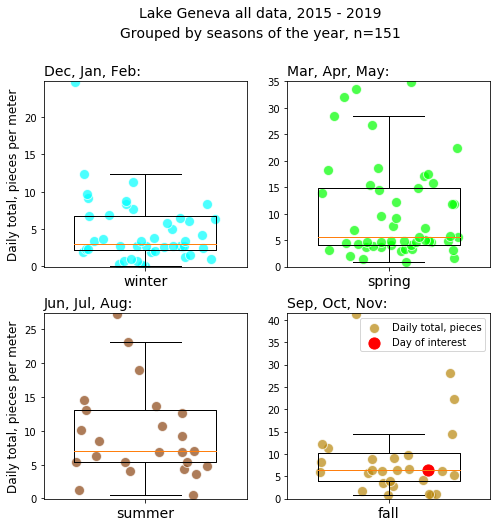

'Chart saved to C:\\Users\\poopy\\Desktop\\Master_semseter_Finale\\Solid_Waste_Engineering\\SWE_2019\\SWE_2019/Charts/LakeGenevabySeaonBoxPlot.svg'

In [8]:
by_month_all = makeSeasonsAllData(all_pcs_day_totals, seasons)
summary_seasons_all = {k:my_utilities.makeSummaryFromAnArray(v) for k,v in by_month_all.items()}
my_day = all_pcs_day_totals[(all_pcs_day_totals.date == date_of_interest)&(all_pcs_day_totals.location_id == place_of_interest)]['pcs_m'].values[0]
title = "{} all data, {} - {}\n".format(region_of_interest, min_date_region.year, max_date_region.year)
seasonalBoxPlots.seasonalBoxPlots(by_month_all, my_day, 10, months, "Daily total, pieces", seasons, title,"LakeGenevabySeaonBoxPlot" , my_folders)

In [9]:
by_month_all = makeSeasonsAllData(all_pcs_day_totals, seasons)
summary_seasons_all = {k:my_utilities.makeSummaryFromAnArray(v) for k,v in by_month_all.items()}

In [10]:
for k,v in summary_seasons_all.items():
    print(k)
    print(v)

winter
{'the_min': 0.118, 'the_max': 50.075, 'the_median': 3.058, 'the_average': 5.595, 'twenty_fifth': 2.177, 'seventy_fifth': 6.713, 'no_samples': 46}
spring
{'the_min': 0.87, 'the_max': 39.562, 'the_median': 5.654, 'the_average': 10.57, 'twenty_fifth': 4.031, 'seventy_fifth': 14.935, 'no_samples': 52}
summer
{'the_min': 0.577, 'the_max': 39.541, 'the_median': 6.984, 'the_average': 10.522, 'twenty_fifth': 5.345, 'seventy_fifth': 13.025, 'no_samples': 25}
fall
{'the_min': 0.777, 'the_max': 77.056, 'the_median': 6.294, 'the_average': 11.108, 'twenty_fifth': 3.85, 'seventy_fifth': 10.104, 'no_samples': 28}


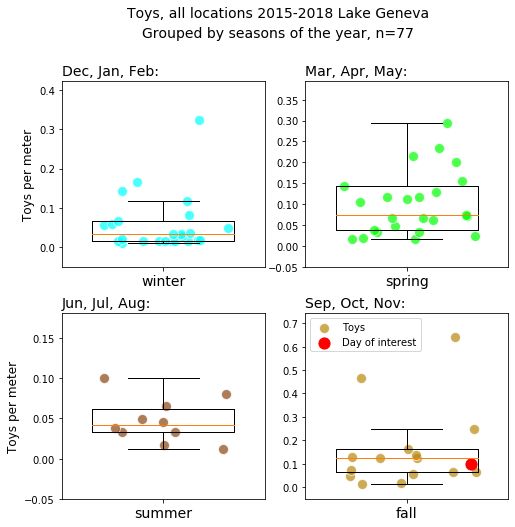

In [11]:
toys_seasonal_summary = makeSeasonalBoxPlots(0,data_of_interest, day_of_interest, names,seasons, my_folders)

In [12]:
print("The summary data for each season:")
for obj in toys_seasonal_summary:    
    for k, v in obj.items():
        print(k)
        print(v)

The summary data for each season:
winter
{'mean': 0.086868, 'median': 0.0328, 'min': 0.0118, 'max': 0.8, 'samples': 25, 'first': datetime.datetime(2015, 12, 4, 0, 0), 'last': datetime.datetime(2018, 1, 23, 0, 0)}
spring
{'mean': 0.11314, 'median': 0.075, 'min': 0.0156, 'max': 0.4375, 'samples': 25, 'first': datetime.datetime(2016, 3, 14, 0, 0), 'last': datetime.datetime(2018, 5, 8, 0, 0)}
summer
{'mean': 0.04729, 'median': 0.0416, 'min': 0.0118, 'max': 0.1, 'samples': 10, 'first': datetime.datetime(2016, 6, 17, 0, 0), 'last': datetime.datetime(2018, 7, 22, 0, 0)}
fall
{'mean': 0.2758705882352941, 'median': 0.125, 'min': 0.0118, 'max': 2.2222, 'samples': 17, 'first': datetime.datetime(2015, 11, 23, 0, 0), 'last': datetime.datetime(2019, 10, 24, 0, 0)}


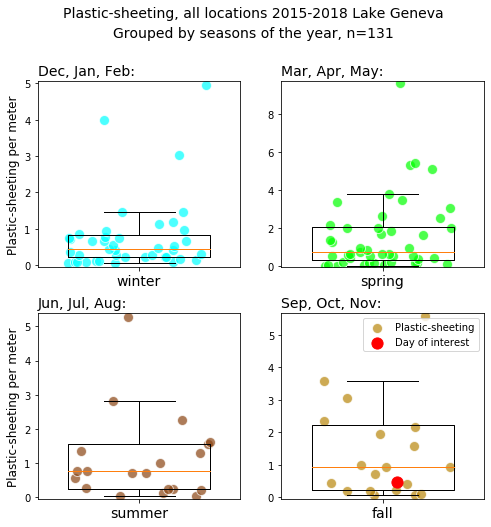

In [13]:
a_seasonal_summary = makeSeasonalBoxPlots(1,data_of_interest, day_of_interest, names,seasons, my_folders)

In [14]:
print("The summary data for each season:")
for obj in a_seasonal_summary:    
    for k, v in obj.items():
        print(k)
        print(v)

The summary data for each season:
winter
{'mean': 1.043693023255814, 'median': 0.4419, 'min': 0.0492, 'max': 13.875, 'samples': 43, 'first': datetime.datetime(2015, 12, 1, 0, 0), 'last': datetime.datetime(2018, 2, 26, 0, 0)}
spring
{'mean': 1.7330042553191491, 'median': 0.7143, 'min': 0.0164, 'max': 10.7188, 'samples': 47, 'first': datetime.datetime(2016, 3, 10, 0, 0), 'last': datetime.datetime(2018, 5, 4, 0, 0)}
summer
{'mean': 1.3219761904761906, 'median': 0.75, 'min': 0.0328, 'max': 5.9286, 'samples': 21, 'first': datetime.datetime(2016, 6, 5, 0, 0), 'last': datetime.datetime(2018, 7, 22, 0, 0)}
fall
{'mean': 1.794655, 'median': 0.9344, 'min': 0.0741, 'max': 10.4286, 'samples': 20, 'first': datetime.datetime(2015, 11, 23, 0, 0), 'last': datetime.datetime(2019, 10, 24, 0, 0)}


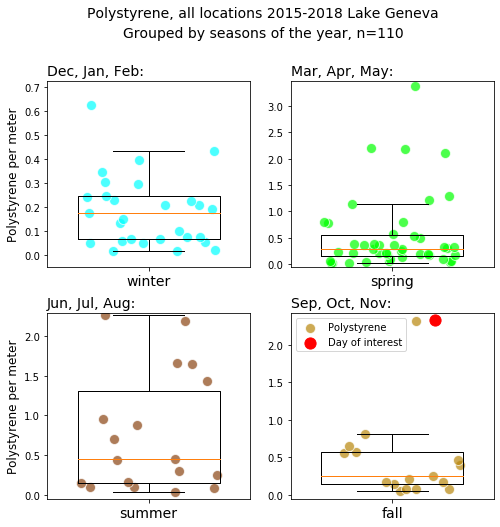

In [15]:
a_seasonal_summary = makeSeasonalBoxPlots(2,data_of_interest, day_of_interest, names,seasons, my_folders)

In [16]:
print("The summary data for each season:")
for obj in a_seasonal_summary:    
    for k, v in obj.items():
        print(k)
        print(v)

The summary data for each season:
winter
{'mean': 0.3840793103448277, 'median': 0.1739, 'min': 0.0145, 'max': 6.1, 'samples': 29, 'first': datetime.datetime(2015, 12, 4, 0, 0), 'last': datetime.datetime(2018, 2, 26, 0, 0)}
spring
{'mean': 0.6056978260869565, 'median': 0.28905000000000003, 'min': 0.0145, 'max': 4.2353, 'samples': 46, 'first': datetime.datetime(2016, 3, 11, 0, 0), 'last': datetime.datetime(2018, 5, 8, 0, 0)}
summer
{'mean': 0.7650888888888888, 'median': 0.44720000000000004, 'min': 0.0328, 'max': 2.2623, 'samples': 18, 'first': datetime.datetime(2016, 6, 5, 0, 0), 'last': datetime.datetime(2018, 7, 22, 0, 0)}
fall
{'mean': 0.5641529411764706, 'median': 0.25, 'min': 0.058, 'max': 2.5556, 'samples': 17, 'first': datetime.datetime(2015, 11, 24, 0, 0), 'last': datetime.datetime(2019, 10, 10, 0, 0)}


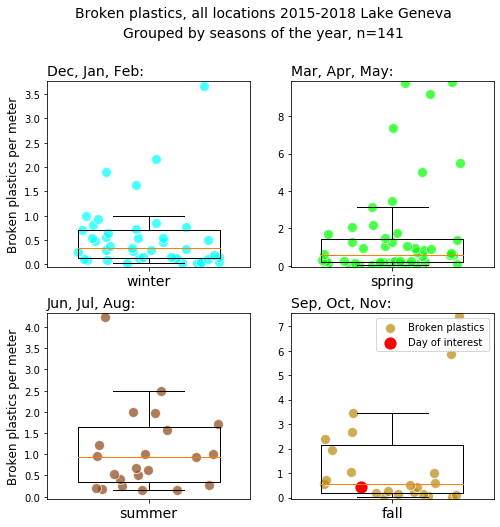

In [17]:
a_seasonal_summary = makeSeasonalBoxPlots(3,data_of_interest, day_of_interest, names,seasons, my_folders)

In [18]:
print("The summary data for each season:")
for obj in a_seasonal_summary:    
    for k, v in obj.items():
        print(k)
        print(v)

The summary data for each season:
winter
{'mean': 0.7133113636363636, 'median': 0.3337, 'min': 0.0189, 'max': 8.2, 'samples': 44, 'first': datetime.datetime(2015, 12, 1, 0, 0), 'last': datetime.datetime(2019, 1, 16, 0, 0)}
spring
{'mean': 1.5632529411764704, 'median': 0.5714, 'min': 0.02, 'max': 9.8235, 'samples': 51, 'first': datetime.datetime(2016, 3, 10, 0, 0), 'last': datetime.datetime(2018, 5, 8, 0, 0)}
summer
{'mean': 1.2274347826086955, 'median': 0.9459, 'min': 0.1475, 'max': 5.1429, 'samples': 23, 'first': datetime.datetime(2016, 6, 5, 0, 0), 'last': datetime.datetime(2018, 7, 22, 0, 0)}
fall
{'mean': 2.5608260869565216, 'median': 0.5556, 'min': 0.0119, 'max': 29.0556, 'samples': 23, 'first': datetime.datetime(2015, 11, 23, 0, 0), 'last': datetime.datetime(2019, 10, 24, 0, 0)}


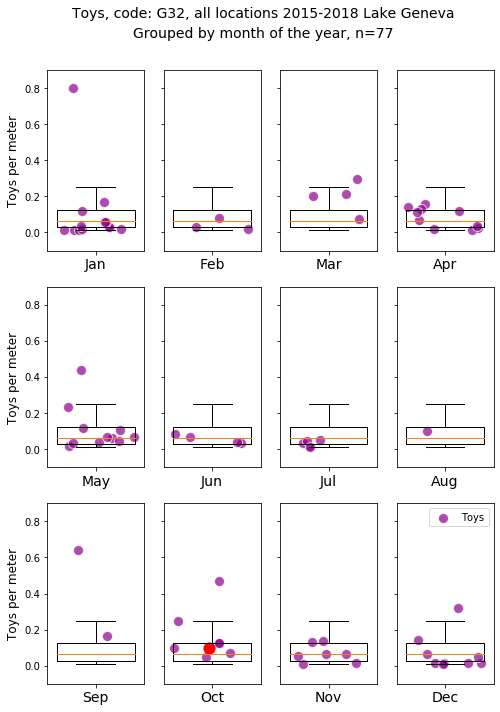

In [19]:
makeMonthlyBoxPlots(0, my_folders,day_of_interest, True)

### How do your results compare ?